In [1]:
## Pip Freezed modules & versions
# Module                 Version
# setuptools             65.5.0
# wheel                  0.37.1
# pandas                 1.5.2
# numpy                  1.23.5
# searbon                0.12.1
# matplotlib             3.6.2
# pillow                 9.3.0
# sklearn

In [2]:
## Essential imports

import os
import random ## For reproducible results
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_classif, SelectKBest ## for feature selection

In [3]:
random.seed(256)

In [4]:
## Setting up required constants to main smooth code flow

DATASET_PATH = "./data/dataset.csv"


In [5]:
if os.path.exists(DATASET_PATH):
    print(f"[INFO] Loading dataset into Pandas Dataframe")
    data = pd.read_csv(DATASET_PATH, memory_map=True)
    print(f"[INFO] Loaded dataset successfully.")
else:
    print(f"[ERROR] Dataset does not exists or is pointed to wrong path. Please correct the path before moving further.")

[INFO] Loading dataset into Pandas Dataframe
[INFO] Loaded dataset successfully.


In [6]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Project Task: Week 1
#### Exploratory Data Analysis:

- Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

- Determine the number of samples present in the data, unique elements in all the features. 

- Check if there is any null value in any features. 

**Correlation of features and feature selection:**

Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

### Part 1: Exploring features

In [7]:
"""
Removing the index column as this feature is not useful for us. It is only for keeping index track of dataframe.
"""

data.drop(["index"],axis=1,inplace=True)

data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [8]:
"""
Finding unique values for each column
"""

for each_feature in data:
    print(f"Feature - {each_feature}")
    print(f"{data[each_feature].value_counts()}")
    print()

Feature - having_IPhaving_IP_Address
 1    7262
-1    3793
Name: having_IPhaving_IP_Address, dtype: int64

Feature - URLURL_Length
-1    8960
 1    1960
 0     135
Name: URLURL_Length, dtype: int64

Feature - Shortining_Service
 1    9611
-1    1444
Name: Shortining_Service, dtype: int64

Feature - having_At_Symbol
 1    9400
-1    1655
Name: having_At_Symbol, dtype: int64

Feature - double_slash_redirecting
 1    9626
-1    1429
Name: double_slash_redirecting, dtype: int64

Feature - Prefix_Suffix
-1    9590
 1    1465
Name: Prefix_Suffix, dtype: int64

Feature - having_Sub_Domain
 1    4070
 0    3622
-1    3363
Name: having_Sub_Domain, dtype: int64

Feature - SSLfinal_State
 1    6331
-1    3557
 0    1167
Name: SSLfinal_State, dtype: int64

Feature - Domain_registeration_length
-1    7389
 1    3666
Name: Domain_registeration_length, dtype: int64

Feature - Favicon
 1    9002
-1    2053
Name: Favicon, dtype: int64

Feature - port
 1    9553
-1    1502
Name: port, dtype: int64

Feat

"""

The result feature in dataset is not biased towards one class. This is expected to give us good results.

"""

In [9]:
data["Result"].unique()

array([-1,  1], dtype=int64)

In [10]:
"""
Let's look at more statistics from dataframe to know about orientation of data
"""

data.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
"""
Check for empty or null values
"""
data.isna().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

"""

The dataset does not have any null/NaN values. This is very helpful because we can utilize all the features without having to drop or fabricate any row/feature.

Additionally, the mean & standard deviation of the each column represents the distribution of differnt values.

"""

In [12]:
"""
Grouping by Result (Target) feature to find the means and std
"""
data_group_by_result = data.groupby('Result')
data_group_by_result.describe()

having_IPhaving_IP_Address                                          \
                            count      mean       std  min  25%  50%  75%   
Result                                                                      
-1                         4898.0  0.213557  0.977030 -1.0 -1.0  1.0  1.0   
 1                         6157.0  0.393536  0.919384 -1.0 -1.0  1.0  1.0   

            URLURL_Length            ... Links_pointing_to_page       \
        max         count      mean  ...                    75%  max   
Result                               ...                               
-1      1.0        4898.0 -0.682523  ...                    1.0  1.0   
 1      1.0        6157.0 -0.593958  ...                    1.0  1.0   

       Statistical_report                                               
                    count      mean       std  min  25%  50%  75%  max  
Result                                                                  
-1                 4898.0  0.657411  0.753609 -1.0  1.0  1.0  1.0  1.0  
 1                 6157.0  0.769043  0.639249 -1.0  1.0  1.0  1.0  1.0  

[2 rows x 240 columns]

"""

This shows that the mean and standard deviation varies with respect to our target feature.

"""

In [13]:
"""
Let's look into most and least correlated features with respect to our target variable and 
plot what insights we have can from them
"""
correlations_on_data = data.corr()['Result']
correlations_on_data = correlations_on_data.sort_values()
print(correlations_on_data)

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


"""

Top 5 Most correlated features to target feature ->

- having_Sub_Domain              0.298323

- web_traffic                    0.346103

- Prefix_Suffix                  0.348606

- URL_of_Anchor                  0.692935

- SSLfinal_State                 0.714741


Top 5 Least correlated features to target feature ->

- Iframe                        -0.003394

- Favicon                       -0.000280

- popUpWidnow                    0.000086

- RightClick                     0.012653

- Submitting_to_email            0.018249


"""

<AxesSubplot: >

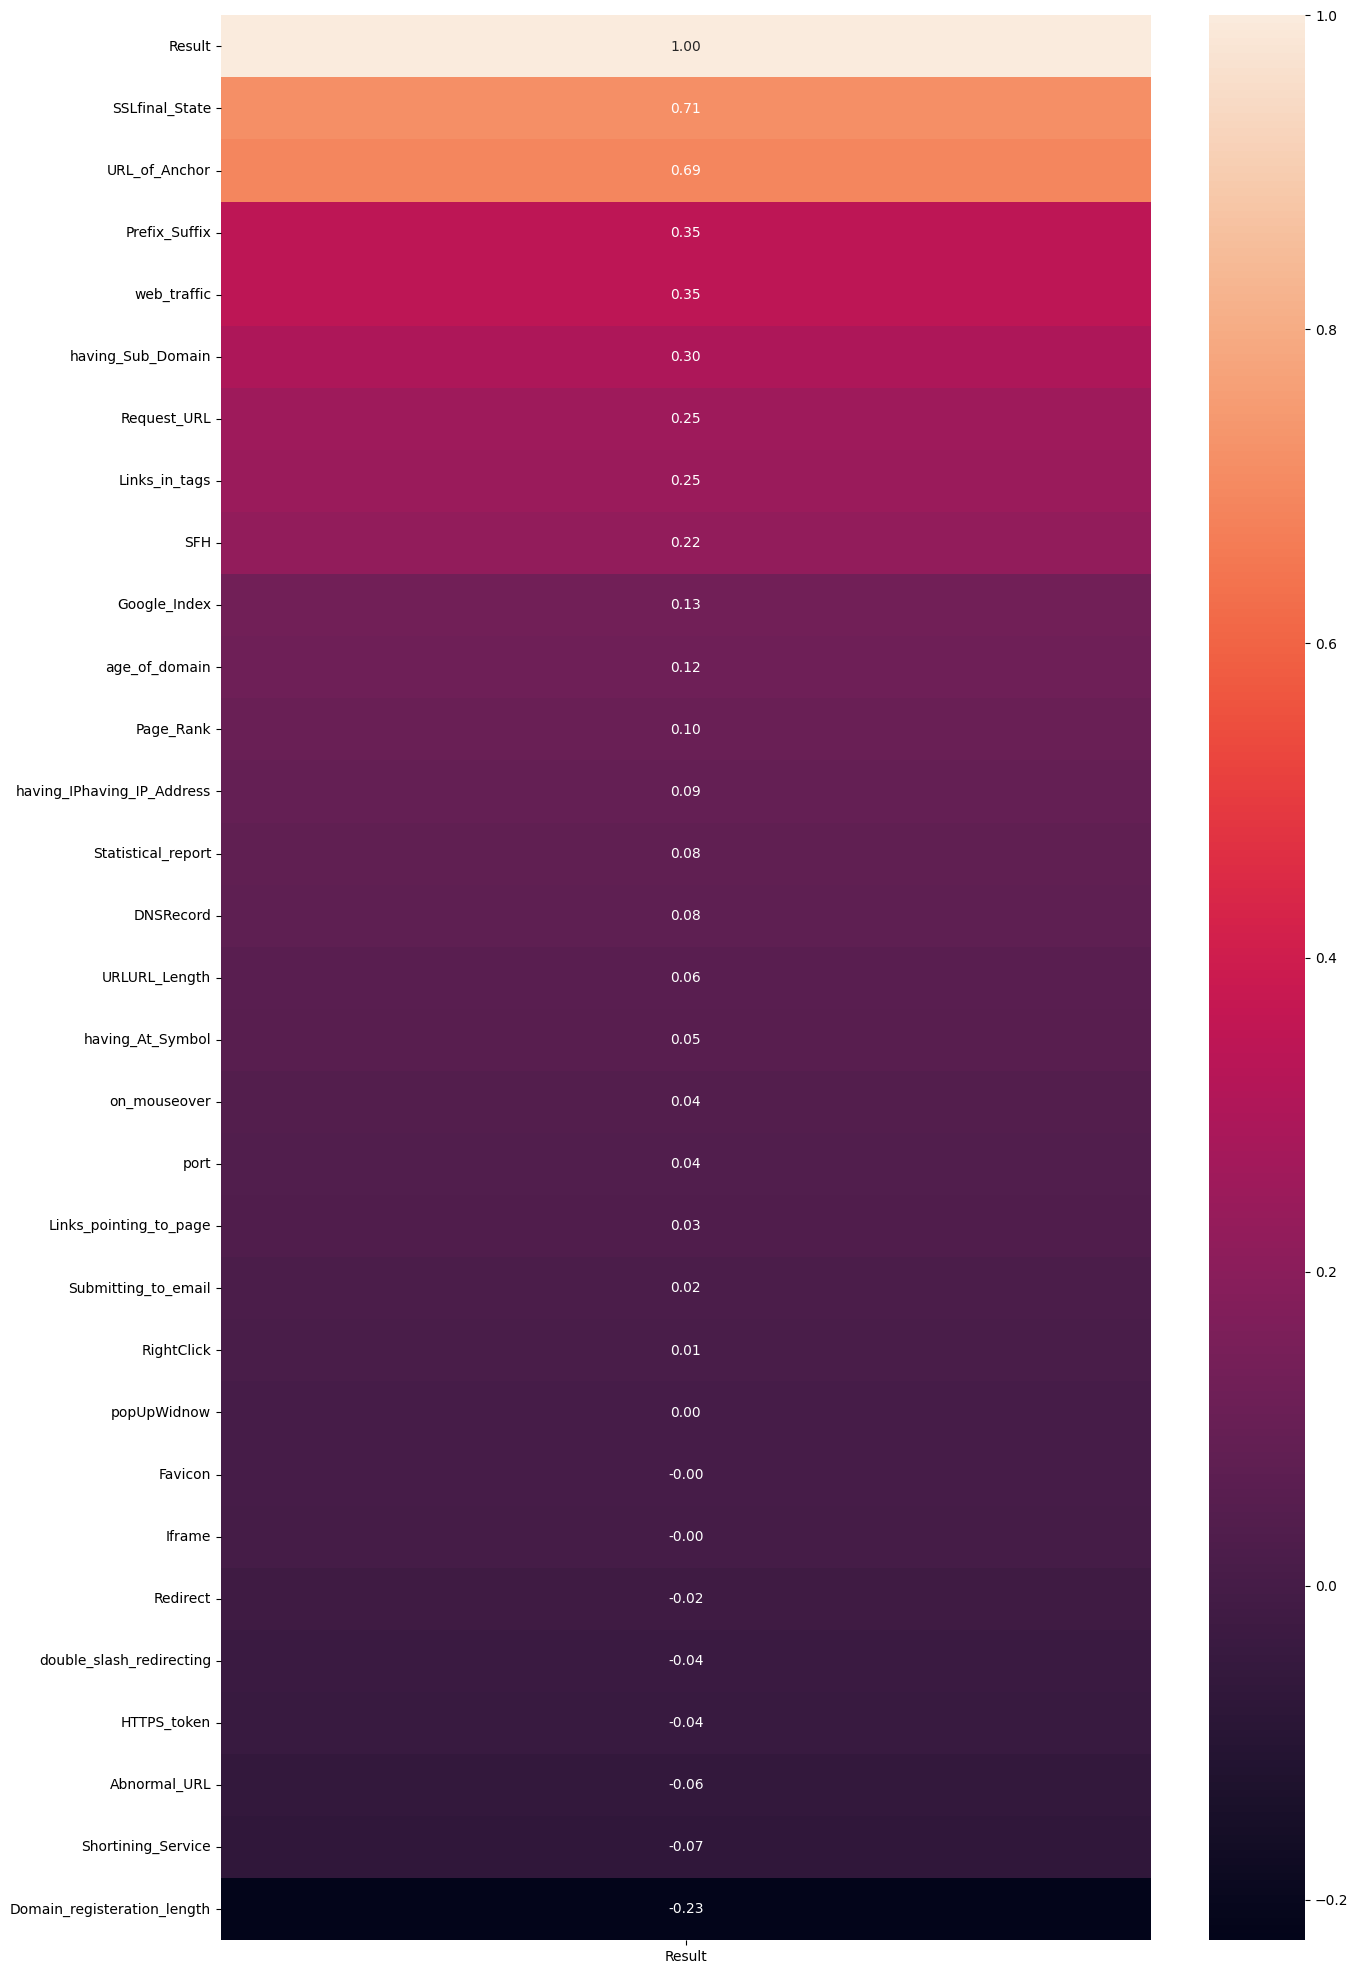

In [14]:
"""
Plotting the headmap of correlation matrix
"""

plt.figure(figsize=(15, 25))
sns.heatmap(data.corr()[["Result"]].sort_values(by='Result', ascending=False),annot=True,fmt=".2f")

In [15]:
"""

To drop column based on some threshold, we can simply use this correlated data, and drop all values from it whose value is 
greater than the threshold.

"""

absolute_correlated_matrix = data.drop(columns='Result',axis=1).corr().abs() ## so that we club all important features on right scale.
upper_triangular_matrix = absolute_correlated_matrix.where(
    np.triu(np.ones(absolute_correlated_matrix.shape),k=1).astype(np.bool)
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10512\1726020302.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(absolute_correlated_matrix.shape),k=1).astype(np.bool)


In [16]:
upper_triangular_matrix

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
having_IPhaving_IP_Address,NaN,0.052411,0.403461,0.158699,0.397389,0.005257,0.080745,0.071414,0.022739,0.087025,...,0.042881,0.096882,0.054694,0.010446,0.050733,0.002922,0.091774,0.029153,0.339065,0.019103
URLURL_Length,NaN,NaN,0.097881,0.075108,0.081247,0.055247,0.003997,0.048754,0.221892,0.042497,...,0.013613,0.049381,0.013838,0.179426,0.040823,0.008993,0.183518,0.002902,0.022987,0.067153
Shortining_Service,NaN,NaN,NaN,0.104447,0.842796,0.080471,0.041916,0.061426,0.060923,0.006101,...,0.038118,0.036616,0.016581,0.052596,0.436064,0.047074,0.014591,0.155844,0.198410,0.085461
having_At_Symbol,NaN,NaN,NaN,NaN,0.086960,0.011726,0.058976,0.031220,0.015522,0.304899,...,0.219503,0.290893,0.284410,0.005499,0.047872,0.032918,0.064735,0.037061,0.006080,0.080357
double_slash_redirecting,NaN,NaN,NaN,NaN,NaN,0.085590,0.043079,0.036200,0.047464,0.035100,...,0.025863,0.054463,0.010459,0.050107,0.431409,0.062369,0.003132,0.178415,0.194165,0.070390
Prefix_Suffix,NaN,NaN,NaN,NaN,NaN,NaN,0.087891,0.261391,0.096799,0.007504,...,0.024868,0.014733,0.036904,0.074116,0.016556,0.110598,0.006834,0.067781,0.067423,0.002763
having_Sub_Domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267649,0.082839,0.016704,...,0.018230,0.025312,0.010637,0.119254,0.125493,0.005764,0.120730,0.057673,0.010526,0.081627
SSLfinal_State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193622,0.014757,...,0.015854,0.013005,0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,0.011710,0.063411
Domain_registeration_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054253,...,0.023520,0.051410,0.004393,0.062851,0.010477,0.134454,0.059898,0.039766,0.122672,0.002212
Favicon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.414382,0.939633,0.627607,0.002628,0.088211,0.050922,0.011699,0.016668,0.127243,0.300917


In [17]:
features_to_drop_based_on_threshold = [column for column in upper_triangular_matrix.columns if any(upper_triangular_matrix[column]>0.90)]
print(f"[INFO] Features which can be dropped: {features_to_drop_based_on_threshold}")

[INFO] Features which can be dropped: ['popUpWidnow']


In [18]:
"""
Dropping the features and exporting the updated data for 2nd step - to train the model
"""

new_data = data.drop(columns=features_to_drop_based_on_threshold,axis=1)
new_data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,1


In [19]:
columns_to_drop_based_on_least_correlation = ['Links_pointing_to_page','on_mouseover','RightClick','Iframe','Redirect','port','Page_Rank']
new_data = new_data.drop(columns=columns_to_drop_based_on_least_correlation,axis=1)
new_data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,age_of_domain,DNSRecord,web_traffic,Google_Index,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,-1,-1,-1,-1,-1,-1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,-1,-1,1,1,-1,-1,0,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,-1,1,1,-1,-1,1,1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,1,-1,-1,0,1,1,1


In [20]:
new_data.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Google_Index',
       'Statistical_report', 'Result'],
      dtype='object')

In [21]:
new_data.to_csv("./data/new_dataset.csv",index=False)